In [7]:
############################ For regression: f_regression, mutual_info_regression
############################ For classification: chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif, mutual_info_classif, mutual_info_regression
from time import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, classification_report, f1_score, plot_roc_curve, roc_auc_score, roc_curve

In [8]:
df = pd.read_csv('cancer.csv')
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [11]:
df['diagnosis'].replace(['M','B'],[1,0], inplace=True)


In [12]:
df.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


In [13]:
df = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','smoothness_se','compactness_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst','diagnosis']]

In [14]:
df.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.1726,0.05623,1.1760,1.256,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752,0.05533,0.7655,2.463,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.1590,0.05648,0.4564,1.075,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.2397,0.07016,0.7260,1.595,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.4087,0.12400,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.1587,0.05884,0.3857,1.428,...,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.2871,0.07039,0


In [15]:
#chekcing class category count
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [16]:
df['radius_mean'] = np.log(df['radius_mean'])
df['texture_mean'] = np.log(df['texture_mean'])
df['perimeter_mean'] = np.log(df['perimeter_mean'])
df['area_mean'] = np.log(df['area_mean'])
df['smoothness_mean'] = np.log(df['smoothness_mean'])
df['compactness_mean'] = np.log(df['compactness_mean'])
df['symmetry_mean'] = np.log(df['symmetry_mean'])
df['fractal_dimension_mean'] = np.log(df['fractal_dimension_mean'])
df['radius_se'] = np.log(df['radius_se'])
df['texture_se'] = np.log(df['texture_se'])
df['perimeter_se'] = np.log(df['perimeter_se'])
df['smoothness_se'] = np.log(df['smoothness_se'])
df['compactness_se'] = np.log(df['compactness_se'])
df['symmetry_se'] = np.log(df['symmetry_se'])
df['fractal_dimension_se'] = np.log(df['fractal_dimension_se'])
df['radius_worst'] = np.log(df['radius_worst'])
df['texture_worst'] = np.log(df['texture_worst'])
df['perimeter_worst'] = np.log(df['perimeter_worst'])
df['area_worst'] = np.log(df['area_worst'])
df['smoothness_worst'] = np.log(df['smoothness_worst'])
df['compactness_worst'] = np.log(df['compactness_worst'])
df['symmetry_worst'] = np.log(df['symmetry_worst'])
df['fractal_dimension_worst'] = np.log(df['fractal_dimension_worst'])

In [17]:
df.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
564,3.070840,3.108614,4.955827,7.299121,-2.198225,-2.155028,-1.756779,-2.878305,0.162119,0.227932,...,-5.463428,3.236716,3.273364,5.112590,7.614312,-1.958995,-1.554476,-1.579879,-2.642965,1
565,3.002211,3.341093,4.876723,7.139660,-2.324831,-2.269150,-1.741827,-2.894440,-0.267226,0.901380,...,-5.992265,3.165053,3.644144,5.043425,7.456455,-2.149006,-1.649219,-1.357901,-2.712510,1
566,2.809403,3.335058,4.684905,6.754721,-2.470412,-2.279846,-1.838851,-2.873869,-0.784386,0.072321,...,-5.548832,2.943386,3.529884,4.841822,7.024649,-2.172434,-1.173120,-1.505979,-2.548486,1
567,3.025291,3.378611,4.942356,7.142827,-2.138767,-1.283738,-1.428367,-2.656977,-0.320205,0.466874,...,-5.085628,3.248046,3.674273,5.218191,7.507141,-1.801810,-0.141448,-0.894774,-2.087474,1
568,2.048982,3.200304,3.869533,5.198497,-2.944469,-3.132240,-1.840740,-2.832933,-0.952695,0.356275,...,-5.884226,2.246649,3.413455,4.080246,5.593223,-2.408390,-2.742021,-1.247925,-2.653704,0


In [18]:
X = df.iloc[:, 0:23].values
X

array([[ 2.88981605,  2.33988088,  4.81055702, ..., -0.40706639,
        -0.77631142, -2.12947248],
       [ 3.0238337 ,  2.87751164,  4.88959697, ..., -1.67878799,
        -1.29098418, -2.41889422],
       [ 2.98011089,  3.0563569 ,  4.86753445, ..., -0.85684327,
        -1.01804664, -2.43520262],
       ...,
       [ 2.8094027 ,  3.33505758,  4.68490515, ..., -1.17312034,
        -1.5059792 , -2.54848563],
       [ 3.02529108,  3.37861088,  4.94235645, ..., -0.14144836,
        -0.89477389, -2.08747371],
       [ 2.04898233,  3.20030444,  3.86953295, ..., -2.74202072,
        -1.24792469, -2.65370407]])

In [19]:
type(X)

numpy.ndarray

In [20]:
Y = df.iloc[:, 23].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [21]:
type(Y)

numpy.ndarray

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))

(398, 23)
(171, 23)
(398,)
(171,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
print(X_train)

[[ 2.62031129  2.88535922  4.47869952 ... -1.7015532  -1.44816976
  -2.65726203]
 [ 2.59301339  2.79667139  4.45550941 ... -1.37397061 -1.58572139
  -2.5733445 ]
 [ 2.68716699  2.63762774  4.58720986 ... -1.01197598 -1.26336901
  -2.38509751]
 ...
 [ 2.65955999  2.82256865  4.50313746 ... -2.98855807 -1.40323708
  -2.79360809]
 [ 2.63762774  2.97654945  4.51217732 ... -1.03057988 -1.14601841
  -2.24904433]
 [ 2.49979526  3.02140002  4.34665849 ... -2.42339771 -1.31155802
  -2.67684227]]


In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit_transform(X_train)

array([[-0.01109677, -0.20429725, -0.05742747, ..., -0.22432948,
        -0.91619086, -0.80198818],
       [-0.12682909, -0.61534403, -0.15106821, ...,  0.31242759,
        -1.60257944, -0.36834967],
       [ 0.27234505, -1.35247321,  0.38073297, ...,  0.90557016,
         0.00597293,  0.60440458],
       ...,
       [ 0.15530226, -0.49531644,  0.04125196, ..., -2.33313802,
        -0.69197481, -1.5065477 ],
       [ 0.06231815,  0.21834762,  0.07775455, ...,  0.87508693,
         0.59155755,  1.30745073],
       [-0.5220372 ,  0.42621923, -0.59060391, ..., -1.40710035,
        -0.23449228, -0.90316781]])

In [29]:
print(X_train)

[[ 2.62031129  2.88535922  4.47869952 ... -1.7015532  -1.44816976
  -2.65726203]
 [ 2.59301339  2.79667139  4.45550941 ... -1.37397061 -1.58572139
  -2.5733445 ]
 [ 2.68716699  2.63762774  4.58720986 ... -1.01197598 -1.26336901
  -2.38509751]
 ...
 [ 2.65955999  2.82256865  4.50313746 ... -2.98855807 -1.40323708
  -2.79360809]
 [ 2.63762774  2.97654945  4.51217732 ... -1.03057988 -1.14601841
  -2.24904433]
 [ 2.49979526  3.02140002  4.34665849 ... -2.42339771 -1.31155802
  -2.67684227]]


In [30]:
print(X_test)

[[ 2.52332576  2.92316158  4.39555965 ... -1.43632529 -1.19931699
  -2.43611649]
 [ 2.94127609  3.05917645  4.81705055 ... -1.45414503 -1.36609965
  -2.71976859]
 [ 2.73825604  2.9693883   4.6220273  ... -1.42961949 -1.25983794
  -2.52335646]
 ...
 [ 2.29293872  2.89369955  4.16821441 ... -1.22077992 -1.34170348
  -2.15244243]
 [ 2.62611682  3.19826487  4.52536912 ... -0.92482706 -1.00758399
  -2.13453151]
 [ 2.55645182  2.64688377  4.44206285 ... -0.53631439 -1.33218504
  -2.13876701]]


In [31]:
scaler.transform(X_test)

array([[-0.42227717, -0.02909236, -0.39314298, ...,  0.21025697,
         0.32559531,  0.34076731],
       [ 1.34966744,  0.6013039 ,  1.30882054, ...,  0.18105863,
        -0.50665743, -1.12498683],
       [ 0.48894249,  0.18515738,  0.52132442, ...,  0.2212447 ,
         0.02359316, -0.11003968],
       ...,
       [-1.3990274 , -0.16564182, -1.31115403, ...,  0.56343661,
        -0.38491945,  1.80663483],
       [ 0.01351639,  1.24594537,  0.1310225 , ...,  1.04836712,
         1.28235134,  1.8991884 ],
       [-0.28183575, -1.30957373, -0.2053649 , ...,  1.68496055,
        -0.33742201,  1.87730172]])

In [32]:
print(X_test)

[[ 2.52332576  2.92316158  4.39555965 ... -1.43632529 -1.19931699
  -2.43611649]
 [ 2.94127609  3.05917645  4.81705055 ... -1.45414503 -1.36609965
  -2.71976859]
 [ 2.73825604  2.9693883   4.6220273  ... -1.42961949 -1.25983794
  -2.52335646]
 ...
 [ 2.29293872  2.89369955  4.16821441 ... -1.22077992 -1.34170348
  -2.15244243]
 [ 2.62611682  3.19826487  4.52536912 ... -0.92482706 -1.00758399
  -2.13453151]
 [ 2.55645182  2.64688377  4.44206285 ... -0.53631439 -1.33218504
  -2.13876701]]


In [33]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.814869,-0.634277,-0.625796,-0.062189,-0.495039,0.209850,-0.401112,0.148044,0.061667,-0.039596,-0.018063,-0.162782,0.000250,-0.002293,-0.026453
1,-0.467221,0.485779,-0.675918,-0.231190,-0.902813,-0.134264,0.238325,0.237006,0.099703,0.225022,-0.030044,-0.025736,0.089986,-0.044065,0.015960
2,1.462611,0.786250,0.319081,0.401893,0.062249,0.062025,0.003964,0.228205,0.375991,0.136415,-0.031838,0.164665,0.118713,0.064412,-0.017232
3,-1.090792,-0.192768,-0.298879,-0.020373,-0.161660,0.283517,0.097672,0.172291,-0.057530,0.173794,0.120682,0.066593,-0.042274,0.007051,0.007767
4,-0.343537,-0.170542,0.261672,-0.312995,-0.140997,0.161055,0.038844,0.172177,-0.093520,-0.045995,0.033793,-0.194793,-0.111848,0.040111,0.028803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.675647,2.809102,0.583288,1.175906,-0.493365,-0.343907,-0.207660,-0.040767,-0.265555,-0.150574,0.176045,-0.188573,0.125511,-0.002656,0.024517
394,-0.112285,0.733806,0.019626,-0.360519,0.207738,-0.385003,-0.075314,-0.024627,0.147875,0.130249,-0.032293,-0.019975,-0.086053,-0.074013,-0.055407
395,-2.715095,-1.554812,-0.212448,-0.005633,-0.428583,0.300535,0.385086,-0.387455,-0.080592,-0.035113,0.077152,0.064294,0.079015,0.072174,0.027247
396,0.013560,-0.064911,-0.959806,-0.399503,0.127114,-0.293268,0.023570,-0.186124,0.031654,0.042677,-0.086234,-0.004409,-0.004432,0.038697,0.024616


In [35]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.034149,0.215746,-0.025040,0.070902,0.212612,-0.154743,-0.188240,-0.105914,-0.025842,-0.011235,0.048764,-0.052659,0.064367,-0.070542,0.002890
1,1.039631,-1.686768,0.106359,0.156094,0.019017,-0.146518,-0.401897,0.262611,-0.076682,-0.087147,-0.060010,-0.004082,0.039201,-0.008432,0.068377
2,0.438744,-0.739881,-0.216496,0.152416,0.313755,-0.351313,-0.115889,-0.047943,0.001001,-0.141119,0.076447,-0.025765,0.006226,-0.073070,0.060477
3,0.073894,1.203785,-0.159621,-0.071209,-0.126457,-0.105927,0.386346,-0.049147,0.226897,-0.099734,-0.095995,0.329601,-0.078213,-0.003306,0.063620
4,-0.118553,1.340758,0.174907,0.032296,-0.242418,-0.279134,0.342804,0.224379,0.370007,0.191286,0.102040,-0.149585,0.083534,-0.015150,0.035305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-1.813264,-0.664878,0.378972,0.311053,0.305833,-0.064174,0.412717,-0.184565,0.035751,-0.213466,-0.080211,0.004392,0.002981,-0.061148,-0.006757
167,-0.483439,-0.634986,0.221054,-0.465449,-0.143144,0.166185,0.038254,-0.228788,-0.045796,-0.205851,0.088636,0.052724,0.060084,-0.072355,0.023529
168,0.914066,2.553641,0.816349,0.126276,-0.429547,0.151329,0.026843,-0.200564,-0.092422,0.109049,-0.197800,-0.124935,0.001021,0.043706,0.056857
169,1.258499,0.945046,0.057104,-0.242556,0.305892,-0.097220,0.149101,-0.323053,-0.125426,-0.055329,0.083193,-0.090165,-0.014313,0.022752,-0.073227


In [36]:
X_train.shape

(398, 15)

In [37]:
X_test.shape

(171, 15)

In [38]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [39]:
lr.coef_

array([[ 3.24762779, -2.2156461 , -0.47458642, -1.80402876,  2.18299559,
        -1.14485465,  0.47052343, -1.0948863 , -1.26812398,  0.08720722,
         0.33307333, -0.19573624, -0.2281951 ,  0.10120811,  0.00803373]])

In [40]:
Y_Pred_train = lr.predict(X_train)
Y_Pred_test = lr.predict(X_test)

In [41]:
print(Y_Pred_train.shape)
print(Y_Pred_test.shape)

(398,)
(171,)


In [43]:
acc_Score_train =  accuracy_score(Y_train,Y_Pred_train)
acc_Score_test = accuracy_score(Y_test,Y_Pred_test)
print("TRAIN SCORE : ", acc_Score_train)
print("TEST SCORE : ", acc_Score_test)

TRAIN SCORE :  0.9597989949748744
TEST SCORE :  0.9883040935672515


#Attempt 3
TRAIN SCORE :  0.9597989949748744
TEST SCORE :  0.9883040935672515

#Attempt 2
TRAIN SCORE :  0.9648351648351648
TEST SCORE :  0.9824561403508771

#Attempt 1
TRAIN SCORE :  0.978021978021978
TEST SCORE :  0.9736842105263158

In [44]:
cmTrain  = confusion_matrix(Y_train, Y_Pred_train)
print(cmTrain)

[[243   6]
 [ 10 139]]


In [45]:
cmTest =  confusion_matrix(Y_test, Y_Pred_test)
print(cmTest)

[[108   0]
 [  2  61]]


In [46]:
classifyTestReport = classification_report(Y_test, Y_Pred_test)
print(classifyTestReport)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [47]:
classifyTrainReport = classification_report(Y_train, Y_Pred_train)
print(classifyTrainReport)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       249
           1       0.96      0.93      0.95       149

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398



In [48]:
# TEST DATA GETTING TPR(SIMILARITY) AND FPR(1-SPECIFICITY) WITH ROC_CURVE FUNCTION
Y_PredProba_test = lr.predict_proba(X_test)

In [49]:
fprTest,tprTest,thresholdTest = roc_curve(Y_test, Y_PredProba_test[:,1], pos_label=1)
print(fprTest)
print(tprTest)
print(thresholdTest)

[0.         0.         0.         0.02777778 0.02777778 1.        ]
[0.         0.01587302 0.98412698 0.98412698 1.         1.        ]
[1.99998852e+00 9.99988523e-01 4.67221891e-01 3.80131487e-01
 3.66834814e-01 1.01857291e-05]


In [50]:
# TRAIN DATA GETTING TPR AND FPR WITH ROC_CURVE FUNCTION
Y_PredProba_train = lr.predict_proba(X_train)

In [51]:
fprTrain,tprTrain,thresholdTrain = roc_curve(Y_train, Y_PredProba_train[:,1], pos_label=1)

In [52]:
print(fprTrain)
print(tprTrain)
print(thresholdTrain)

[0.         0.         0.         0.00401606 0.00401606 0.00803213
 0.00803213 0.01204819 0.01204819 0.02008032 0.02008032 0.02409639
 0.02409639 0.03212851 0.03212851 0.03614458 0.03614458 0.04016064
 0.04016064 0.04417671 0.04417671 0.06827309 0.06827309 0.08433735
 0.08433735 0.19277108 0.19277108 0.3935743  0.3935743  1.        ]
[0.         0.00671141 0.88590604 0.88590604 0.89932886 0.89932886
 0.90604027 0.90604027 0.91946309 0.91946309 0.9261745  0.9261745
 0.93288591 0.93288591 0.93959732 0.93959732 0.95302013 0.95302013
 0.95973154 0.95973154 0.96644295 0.96644295 0.97986577 0.97986577
 0.98657718 0.98657718 0.99328859 0.99328859 1.         1.        ]
[1.99999891e+00 9.99998914e-01 6.59889605e-01 6.58714782e-01
 6.44496756e-01 6.28207015e-01 5.95383587e-01 5.86605895e-01
 5.66515108e-01 5.51014958e-01 5.25675496e-01 5.22448052e-01
 5.04604401e-01 4.43915785e-01 4.39940219e-01 4.31302407e-01
 4.17265233e-01 3.97851212e-01 3.81752410e-01 3.58979016e-01
 3.50434979e-01 2.975277

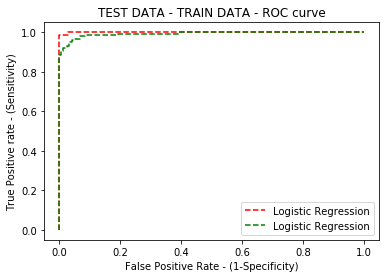

In [53]:
#plot roc curves
plt.plot(fprTest, tprTest, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fprTrain, tprTrain, linestyle='--',color='green', label='Logistic Regression')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('TEST DATA - TRAIN DATA - ROC curve')
# x label
plt.xlabel('False Positive Rate - (1-Specificity)')
# y label
plt.ylabel('True Positive rate - (Sensitivity)')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [8]:
# print(df['radius_mean'].isnull().sum())
# print(df['texture_mean'].isnull().sum())
# print(df['perimeter_mean'].isnull().sum())
# print(df['area_mean'].isnull().sum())
# print(df['smoothness_mean'].isnull().sum())
# print(df['compactness_mean'].isnull().sum())
# print(df['concavity_mean'].isnull().sum())
# print(df['concave points_mean'].isnull().sum())
# print(df['symmetry_mean'].isnull().sum())
# print(df['fractal_dimension_mean'].isnull().sum())
# print(df['radius_se'].isnull().sum())
# print(df['texture_se'].isnull().sum())
# print(df['perimeter_se'].isnull().sum())
# print(df['area_se'].isnull().sum())
# print(df['smoothness_se'].isnull().sum())
# print(df['compactness_se'].isnull().sum())
# print(df['concavity_se'].isnull().sum())
# print(df['concave points_se'].isnull().sum())
# print(df['symmetry_se'].isnull().sum())
# print(df['fractal_dimension_se'].isnull().sum())
# print(df['radius_worst'].isnull().sum())
# print(df['texture_worst'].isnull().sum())
# print(df['perimeter_worst'].isnull().sum())
# print(df['area_worst'].isnull().sum())
# print(df['smoothness_worst'].isnull().sum())
# print(df['compactness_worst'].isnull().sum())
# print(df['concavity_worst'].isnull().sum())
# print(df['concave points_worst'].isnull().sum())
# print(df['symmetry_worst'].isnull().sum())
# print(df['fractal_dimension_worst'].isnull().sum())
# print(df['diagnosis'].isnull().sum())


(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

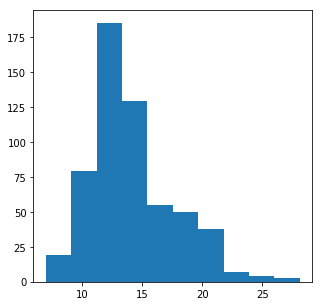

In [11]:
#before transformation
plt.figure(figsize=(5,5))
plt.hist(df['radius_mean'])

(array([  4.,  16.,  50., 113., 154.,  94.,  58.,  61.,  13.,   6.]),
 array([1.94319217, 2.08248549, 2.22177882, 2.36107214, 2.50036546,
        2.63965878, 2.7789521 , 2.91824542, 3.05753874, 3.19683206,
        3.33612538]),
 <a list of 10 Patch objects>)

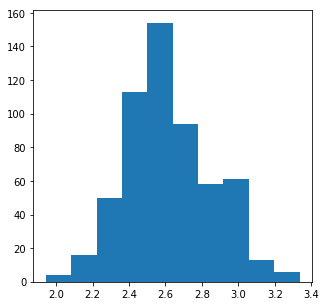

In [14]:
#after transformation
trm = df['radius_mean']
trm = np.log(trm)
plt.figure(figsize=(5,5))
plt.hist(trm)

In [68]:
print(trm.mean())
print(trm.std())

2.619130890736058
0.23818853442141905


(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <a list of 10 Patch objects>)

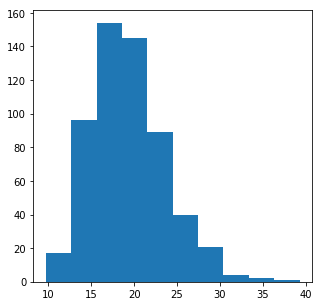

In [12]:
#before transformation
plt.figure(figsize=(5,5))
plt.hist(df['texture_mean'])

(array([  7.,  14.,  57., 101., 139., 138.,  71.,  33.,   8.,   1.]),
 array([2.27315628, 2.4129122 , 2.55266812, 2.69242404, 2.83217996,
        2.97193588, 3.1116918 , 3.25144772, 3.39120364, 3.53095956,
        3.67071548]),
 <a list of 10 Patch objects>)

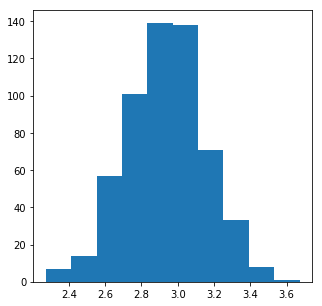

In [15]:
#after transformation
ttm = df['texture_mean']
ttm = np.log(ttm)
plt.figure(figsize=(5,5))
plt.hist(ttm)

(array([ 15.,  93., 185., 116.,  62.,  49.,  34.,   8.,   3.,   4.]),
 array([ 43.79 ,  58.261,  72.732,  87.203, 101.674, 116.145, 130.616,
        145.087, 159.558, 174.029, 188.5  ]),
 <a list of 10 Patch objects>)

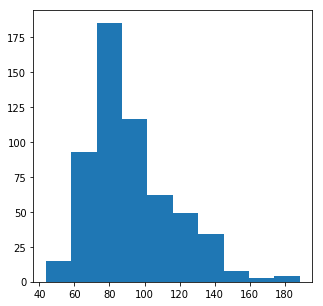

In [16]:
#before transformation
plt.figure(figsize=(5,5))
plt.hist(df['perimeter_mean'])

(array([  4.,  11.,  53., 121., 148.,  93.,  59.,  58.,  15.,   7.]),
 array([3.77940548, 3.92537473, 4.07134399, 4.21731324, 4.36328249,
        4.50925174, 4.655221  , 4.80119025, 4.9471595 , 5.09312875,
        5.23909801]),
 <a list of 10 Patch objects>)

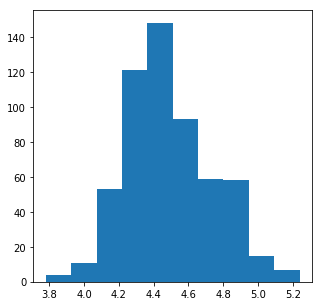

In [17]:
#after transformation
tpm = df['perimeter_mean']
tpm = np.log(tpm)
plt.figure(figsize=(5,5))
plt.hist(tpm)

(array([  4.,  16.,  47., 112., 154.,  96.,  57.,  65.,  14.,   4.]),
 array([4.96633504, 5.25214612, 5.53795721, 5.8237683 , 6.10957939,
        6.39539048, 6.68120157, 6.96701266, 7.25282375, 7.53863484,
        7.82444593]),
 <a list of 10 Patch objects>)

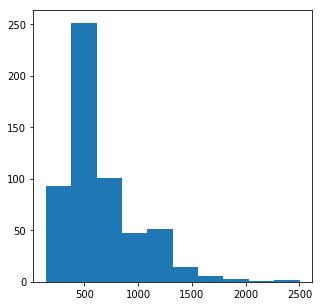

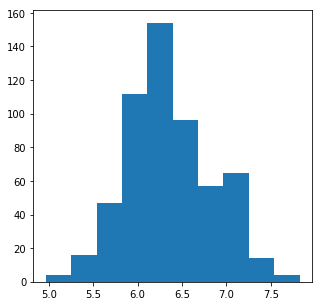

In [18]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['area_mean'])
tam = df['area_mean']
tam = np.log(tam)
plt.figure(figsize=(5,5))
plt.hist(tam)

(array([  1.,   3.,  18.,  71., 147., 167., 118.,  36.,   7.,   1.]),
 array([-2.94446898, -2.83117749, -2.717886  , -2.60459451, -2.49130303,
        -2.37801154, -2.26472005, -2.15142856, -2.03813707, -1.92484558,
        -1.8115541 ]),
 <a list of 10 Patch objects>)

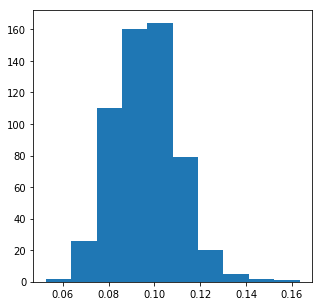

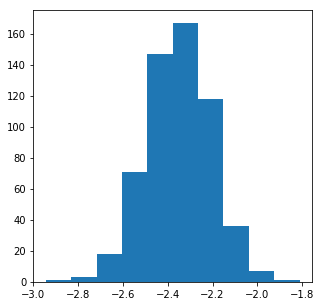

In [19]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['smoothness_mean'])
tsm = df['smoothness_mean']
tsm = np.log(tsm)
plt.figure(figsize=(5,5))
plt.hist(tsm)

(array([  2.,   6.,  37.,  80., 112., 107., 117.,  68.,  31.,   9.]),
 array([-3.94351367, -3.65546752, -3.36742136, -3.0793752 , -2.79132905,
        -2.50328289, -2.21523674, -1.92719058, -1.63914443, -1.35109827,
        -1.06305211]),
 <a list of 10 Patch objects>)

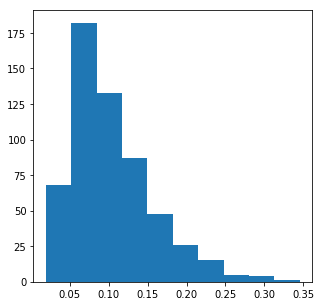

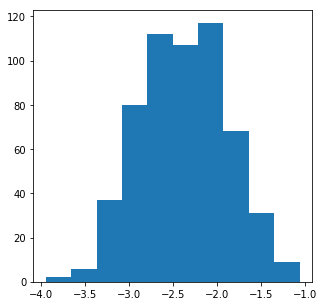

In [21]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['compactness_mean'])
tcm = df['compactness_mean']
tcm = np.log(tcm)
plt.figure(figsize=(5,5))
plt.hist(tcm)

ValueError: supplied range of [-inf, -0.8514397595545387] is not finite

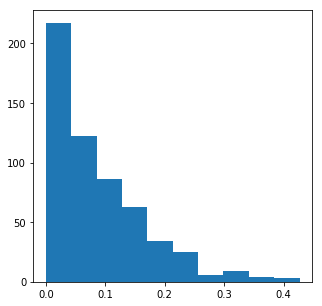

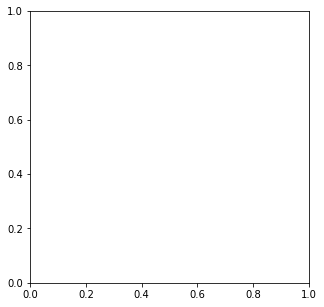

In [27]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['concavity_mean'])
tconm = df['concavity_mean']
tconm = np.log(tconm)
plt.figure(figsize=(5,5))
plt.hist(tconm)

(array([139., 174.,  76.,  57.,  66.,  23.,  15.,  12.,   2.,   5.]),
 array([0.     , 0.02012, 0.04024, 0.06036, 0.08048, 0.1006 , 0.12072,
        0.14084, 0.16096, 0.18108, 0.2012 ]),
 <a list of 10 Patch objects>)

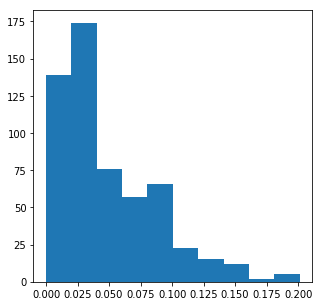

In [31]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['concave points_mean'])
# tcpm = df['concave points_mean']
# tcpm = np.log(tcpm)
# plt.figure(figsize=(5,5))
# plt.hist(tcpm)

In [30]:
tcpm

0     -1.916643
1     -2.656834
2     -2.056507
3     -2.251892
4     -2.260484
         ...   
564   -1.974001
565   -2.323707
566   -2.937086
567   -1.883875
568        -inf
Name: concave points_mean, Length: 569, dtype: float64

(array([  2.,   6.,  32.,  96., 152., 162.,  79.,  26.,  11.,   3.]),
 array([-2.24431618, -2.13895732, -2.03359846, -1.9282396 , -1.82288074,
        -1.71752188, -1.61216302, -1.50680416, -1.4014453 , -1.29608644,
        -1.19072758]),
 <a list of 10 Patch objects>)

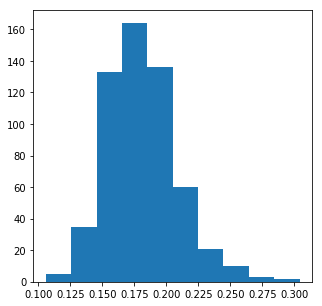

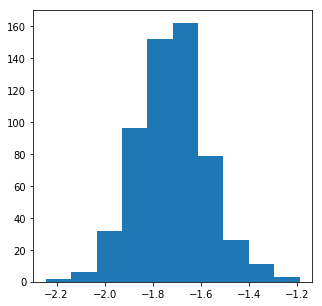

In [32]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['symmetry_mean'])
tsm = df['symmetry_mean']
tsm = np.log(tsm)
plt.figure(figsize=(5,5))
plt.hist(tsm)

(array([ 24., 101., 135., 141.,  90.,  45.,  19.,   8.,   2.,   4.]),
 array([-2.99653259, -2.92973118, -2.86292977, -2.79612836, -2.72932695,
        -2.66252553, -2.59572412, -2.52892271, -2.4621213 , -2.39531989,
        -2.32851848]),
 <a list of 10 Patch objects>)

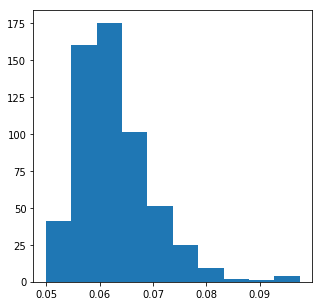

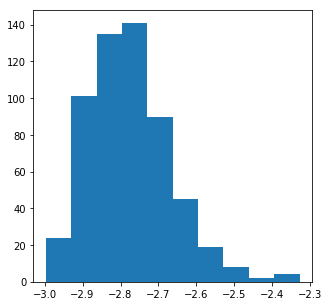

In [33]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['fractal_dimension_mean'])
tfdm = df['fractal_dimension_mean']
tfdm = np.log(tfdm)
plt.figure(figsize=(5,5))
plt.hist(tfdm)

(array([ 23.,  82., 144., 129.,  86.,  54.,  35.,  13.,   1.,   2.]),
 array([-2.19373069, -1.86882194, -1.54391319, -1.21900445, -0.8940957 ,
        -0.56918695, -0.24427821,  0.08063054,  0.40553929,  0.73044803,
         1.05535678]),
 <a list of 10 Patch objects>)

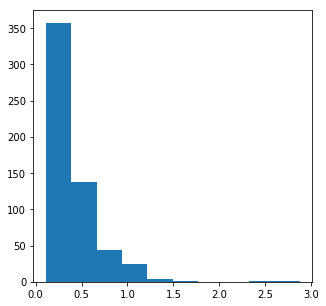

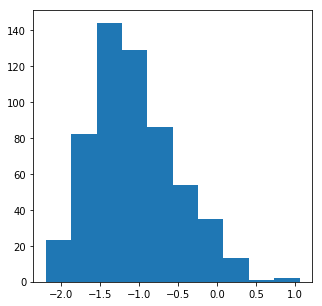

In [34]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['radius_se'])
trse = df['radius_se']
trse = np.log(trse)
plt.figure(figsize=(5,5))
plt.hist(trse)

(array([ 11.,  33.,  76., 118., 133., 114.,  56.,  20.,   6.,   2.]),
 array([-1.02109585, -0.76036933, -0.49964282, -0.23891631,  0.02181021,
         0.28253672,  0.54326323,  0.80398975,  1.06471626,  1.32544277,
         1.58616929]),
 <a list of 10 Patch objects>)

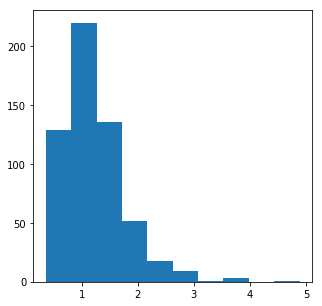

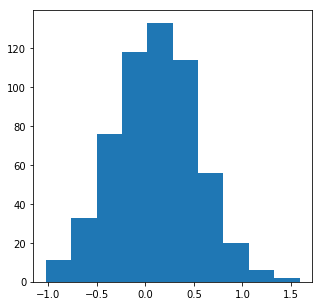

In [35]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['texture_se'])
ttse = df['texture_se']
ttse = np.log(ttse)
plt.figure(figsize=(5,5))
plt.hist(ttse)

(array([ 17.,  87., 136., 142.,  88.,  56.,  28.,  13.,   0.,   2.]),
 array([-0.27839203,  0.05846047,  0.39531297,  0.73216547,  1.06901796,
         1.40587046,  1.74272296,  2.07957546,  2.41642795,  2.75328045,
         3.09013295]),
 <a list of 10 Patch objects>)

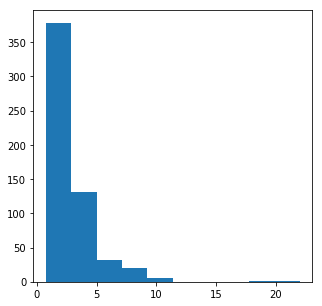

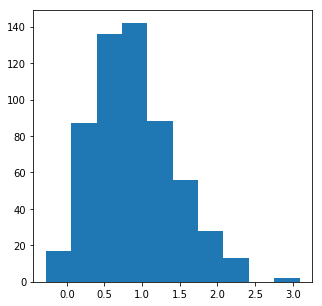

In [36]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['perimeter_se'])
tpse = df['perimeter_se']
tpse = np.log(tpse)
plt.figure(figsize=(5,5))
plt.hist(tpse)

(array([ 22.,  84., 193., 103.,  65.,  50.,  38.,  11.,   1.,   2.]),
 array([1.91721669, 2.35505851, 2.79290034, 3.23074216, 3.66858399,
        4.10642581, 4.54426764, 4.98210946, 5.41995129, 5.85779311,
        6.29563494]),
 <a list of 10 Patch objects>)

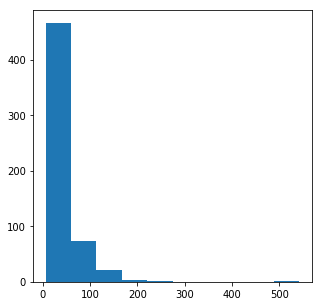

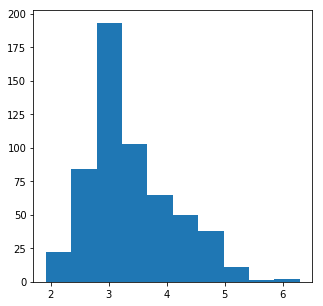

In [37]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['area_se'])
tase = df['area_se']
tase = np.log(tase)
plt.figure(figsize=(5,5))
plt.hist(tase)

(array([  1.,   5.,  40., 132., 188., 124.,  56.,  18.,   3.,   2.]),
 array([-6.36950906, -6.07951648, -5.78952391, -5.49953133, -5.20953875,
        -4.91954618, -4.6295536 , -4.33956102, -4.04956845, -3.75957587,
        -3.46958329]),
 <a list of 10 Patch objects>)

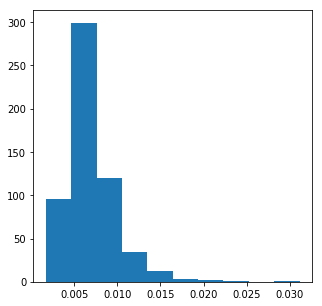

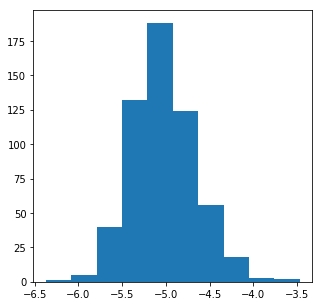

In [38]:
#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['smoothness_se'])
tsse = df['smoothness_se']
tsse = np.log(tsse)
plt.figure(figsize=(5,5))
plt.hist(tsse)

(array([  2.,   8.,  18.,  77., 128., 126., 122.,  56.,  26.,   6.]),
 array([-6.09593657, -5.6862951 , -5.27665364, -4.86701217, -4.45737071,
        -4.04772924, -3.63808778, -3.22844631, -2.81880485, -2.40916338,
        -1.99952192]),
 <a list of 10 Patch objects>)

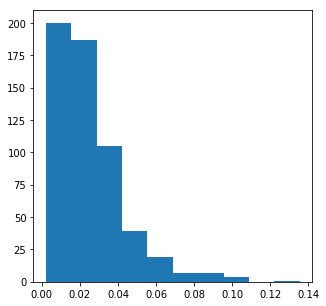

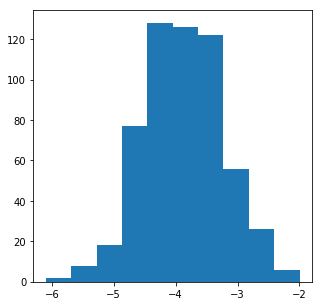

In [39]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['compactness_se'])
tcose = df['compactness_se']
tcose = np.log(tcose)
plt.figure(figsize=(5,5))
plt.hist(tcose)

ValueError: supplied range of [-inf, -0.9263410677276565] is not finite

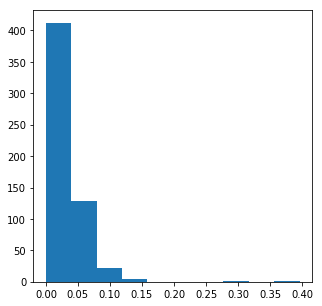

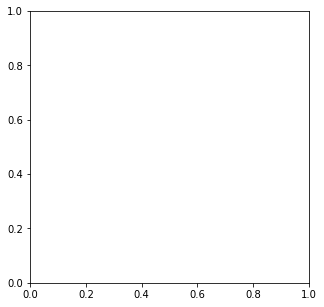

In [40]:


#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['concavity_se'])
tconse = df['concavity_se']
tconse = np.log(tconse)
plt.figure(figsize=(5,5))
plt.hist(tconse)

ValueError: supplied range of [-inf, -2.941433500146612] is not finite

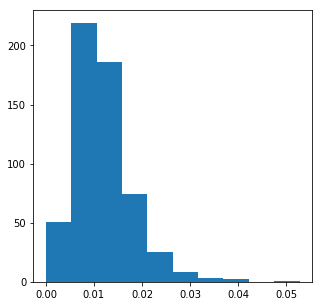

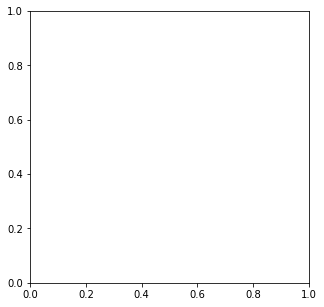

In [41]:


#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['concave points_se'])
tconpse = df['concave points_se']
tconpse = np.log(tconpse)
plt.figure(figsize=(5,5))
plt.hist(tconpse)

(array([  2.,  41., 128., 164., 113.,  72.,  29.,  11.,   8.,   1.]),
 array([-4.8431736 , -4.61275029, -4.38232699, -4.15190368, -3.92148038,
        -3.69105707, -3.46063376, -3.23021046, -2.99978715, -2.76936384,
        -2.53894054]),
 <a list of 10 Patch objects>)

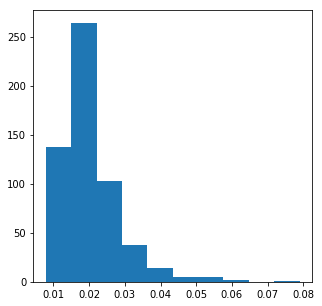

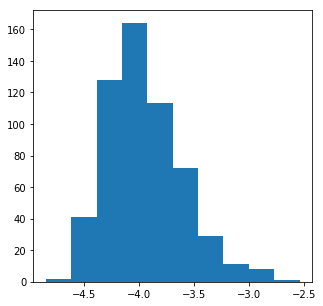

In [42]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['symmetry_se'])
tsyse = df['symmetry_se']
tsyse = np.log(tsyse)
plt.figure(figsize=(5,5))
plt.hist(tsyse)

(array([ 10.,  67., 118., 148., 129.,  59.,  24.,  10.,   1.,   3.]),
 array([-7.01891033, -6.66820985, -6.31750936, -5.96680888, -5.6161084 ,
        -5.26540792, -4.91470743, -4.56400695, -4.21330647, -3.86260599,
        -3.5119055 ]),
 <a list of 10 Patch objects>)

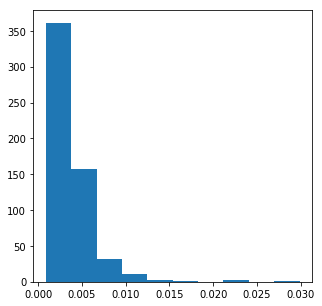

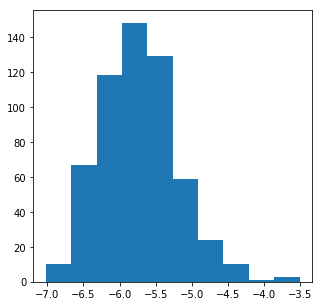

In [43]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['fractal_dimension_se'])
tfdse = df['fractal_dimension_se']
tfdse = np.log(tfdse)
plt.figure(figsize=(5,5))
plt.hist(tfdse)

(array([  6.,  28.,  80., 149., 120.,  56.,  60.,  50.,  15.,   5.]),
 array([2.07065304, 2.22205068, 2.37344832, 2.52484595, 2.67624359,
        2.82764123, 2.97903887, 3.13043651, 3.28183415, 3.43323179,
        3.58462943]),
 <a list of 10 Patch objects>)

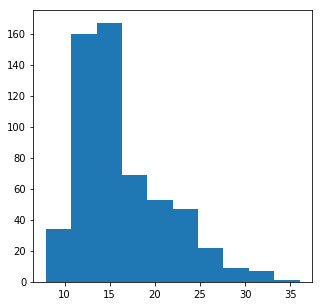

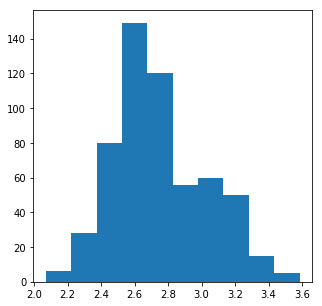

In [44]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['radius_worst'])
trw = df['radius_worst']
trw = np.log(trw)
plt.figure(figsize=(5,5))
plt.hist(trw)

(array([  3.,  15.,  53.,  73., 105., 138., 106.,  56.,  16.,   4.]),
 array([2.48657193, 2.62819278, 2.76981363, 2.91143448, 3.05305533,
        3.19467618, 3.33629703, 3.47791788, 3.61953873, 3.76115957,
        3.90278042]),
 <a list of 10 Patch objects>)

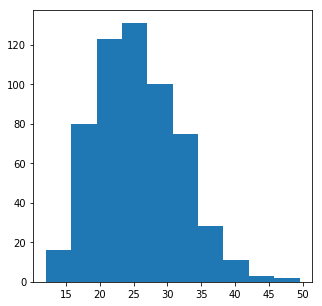

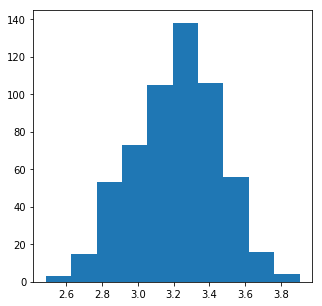

In [45]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['texture_worst'])
ttw = df['texture_worst']
ttw = np.log(ttw)
plt.figure(figsize=(5,5))
plt.hist(ttw)

(array([  8.,  31.,  77., 151., 112.,  71.,  58.,  42.,  15.,   4.]),
 array([3.92018957, 4.08079555, 4.24140154, 4.40200753, 4.56261351,
        4.7232195 , 4.88382549, 5.04443147, 5.20503746, 5.36564345,
        5.52624943]),
 <a list of 10 Patch objects>)

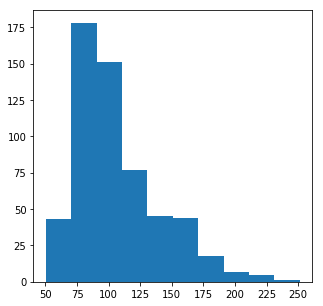

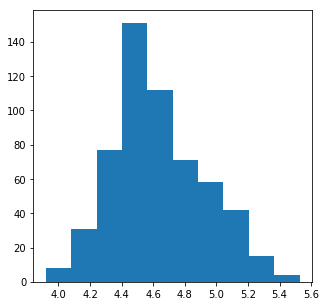

In [46]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['perimeter_worst'])
tpw = df['perimeter_worst']
tpw = np.log(tpw)
plt.figure(figsize=(5,5))
plt.hist(tpw)

(array([  6.,  26.,  80., 153., 121.,  55.,  69.,  42.,  12.,   5.]),
 array([5.22143632, 5.53485419, 5.84827206, 6.16168992, 6.47510779,
        6.78852566, 7.10194353, 7.41536139, 7.72877926, 8.04219713,
        8.355615  ]),
 <a list of 10 Patch objects>)

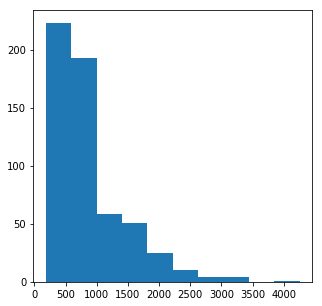

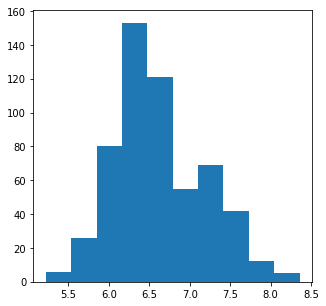

In [47]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['area_worst'])
taw = df['area_worst']
taw = np.log(taw)
plt.figure(figsize=(5,5))
plt.hist(taw)

(array([  1.,   8.,  34.,  70., 113., 150., 127.,  43.,  19.,   4.]),
 array([-2.6426839 , -2.52865339, -2.41462289, -2.30059238, -2.18656187,
        -2.07253137, -1.95850086, -1.84447036, -1.73043985, -1.61640935,
        -1.50237884]),
 <a list of 10 Patch objects>)

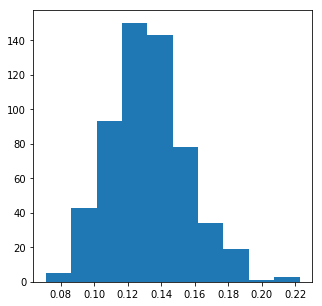

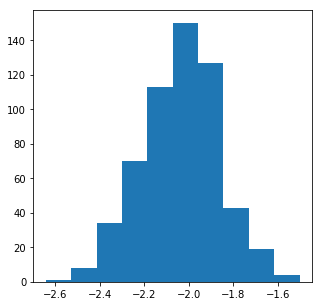

In [48]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['smoothness_worst'])
tsmw = df['smoothness_worst']
tsmw = np.log(tsmw)
plt.figure(figsize=(5,5))
plt.hist(tsmw)

(array([  2.,  11.,  27.,  58.,  95., 142., 104.,  91.,  29.,  10.]),
 array([-3.60123494, -3.23547342, -2.86971189, -2.50395036, -2.13818883,
        -1.77242731, -1.40666578, -1.04090425, -0.67514272, -0.30938119,
         0.05638033]),
 <a list of 10 Patch objects>)

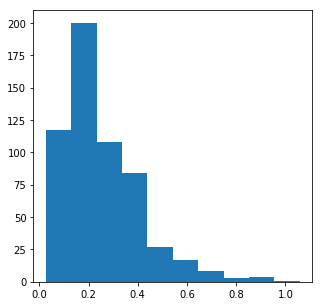

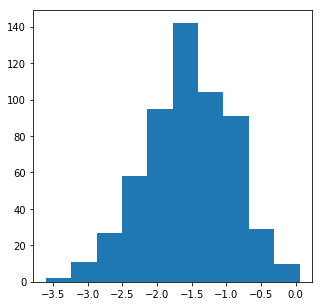

In [49]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['compactness_worst'])
tcmw = df['compactness_worst']
tcmw = np.log(tcmw)
plt.figure(figsize=(5,5))
plt.hist(tcmw)

ValueError: supplied range of [-inf, 0.2247422726779068] is not finite

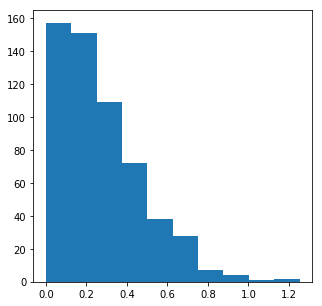

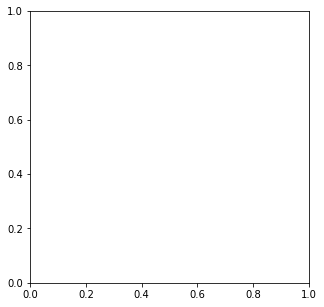

In [50]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['concavity_worst'])
tcnw = df['concavity_worst']
tcnw = np.log(tcnw)
plt.figure(figsize=(5,5))
plt.hist(tcnw)

ValueError: supplied range of [-inf, -1.2344320118106444] is not finite

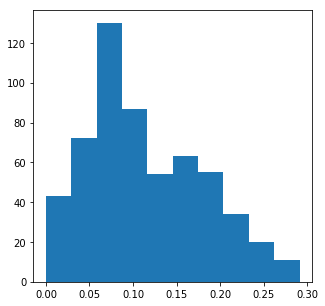

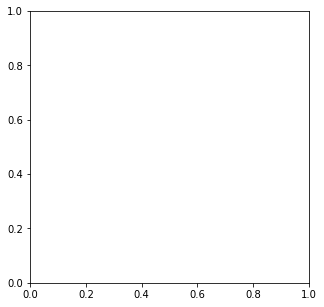

In [51]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['concave points_worst'])
tcnpw = df['concave points_worst']
tcnpw = np.log(tcnpw)
plt.figure(figsize=(5,5))
plt.hist(tcnpw)

(array([  8.,  15.,  86., 162., 177.,  79.,  24.,  13.,   3.,   2.]),
 array([-1.85469927, -1.71020678, -1.56571429, -1.4212218 , -1.27672931,
        -1.13223682, -0.98774434, -0.84325185, -0.69875936, -0.55426687,
        -0.40977438]),
 <a list of 10 Patch objects>)

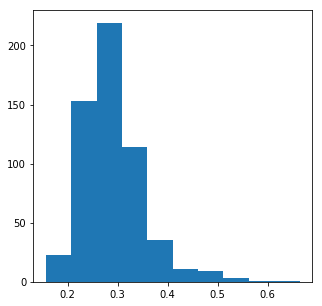

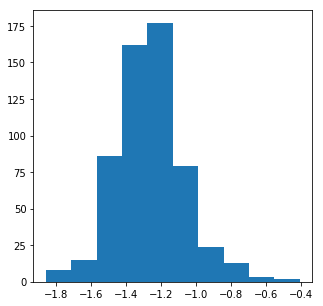

In [52]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['symmetry_worst'])
tsymw = df['symmetry_worst']
tsymw = np.log(tsymw)
plt.figure(figsize=(5,5))
plt.hist(tsymw)

(array([ 30., 114., 177., 122.,  73.,  28.,  16.,   7.,   1.,   1.]),
 array([-2.89969509, -2.76698797, -2.63428086, -2.50157374, -2.36886663,
        -2.23615951, -2.1034524 , -1.97074528, -1.83803817, -1.70533105,
        -1.57262394]),
 <a list of 10 Patch objects>)

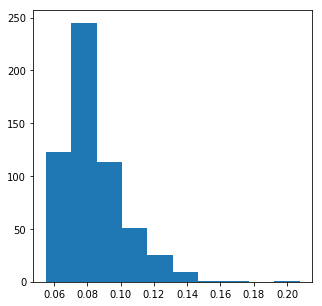

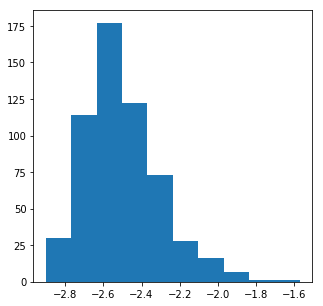

In [53]:

#before and after transformation
plt.figure(figsize=(5,5))
plt.hist(df['fractal_dimension_worst'])
tfdiw = df['fractal_dimension_worst']
tfdiw = np.log(tfdiw)
plt.figure(figsize=(5,5))
plt.hist(tfdiw)

In [ ]:
# print(df['radius_mean'].isnull().sum())
# print(df['texture_mean'].isnull().sum())
# print(df['perimeter_mean'].isnull().sum())
# print(df['area_mean'].isnull().sum())
# print(df['smoothness_mean'].isnull().sum())
# print(df['compactness_mean'].isnull().sum())
# print(df['concavity_mean'].isnull().sum())
# print(df['concave points_mean'].isnull().sum())
# print(df['symmetry_mean'].isnull().sum())
# print(df['fractal_dimension_mean'].isnull().sum())
# print(df['radius_se'].isnull().sum())
# print(df['texture_se'].isnull().sum())
# print(df['perimeter_se'].isnull().sum())
# print(df['area_se'].isnull().sum())
# print(df['smoothness_se'].isnull().sum())
# print(df['compactness_se'].isnull().sum())
# print(df['concavity_se'].isnull().sum())
# print(df['concave points_se'].isnull().sum())
# print(df['symmetry_se'].isnull().sum())
# print(df['fractal_dimension_se'].isnull().sum())
# print(df['radius_worst'].isnull().sum())
# print(df['texture_worst'].isnull().sum())
# print(df['perimeter_worst'].isnull().sum())
# print(df['area_worst'].isnull().sum())
# print(df['smoothness_worst'].isnull().sum())
# print(df['compactness_worst'].isnull().sum())
# print(df['concavity_worst'].isnull().sum())
# print(df['concave points_worst'].isnull().sum())
# print(df['symmetry_worst'].isnull().sum())
# print(df['fractal_dimension_worst'].isnull().sum())